<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project1</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import xgboost as xgb

import joblib

In [2]:
import warnings
warnings.filterwarnings('ignore')
#We added this code so that it does not display errors as a red box

## Load and Prepare Data

In [3]:
df = pd.read_csv('country_vaccinations_by_manufacturer.csv')

## EDA

In [4]:
df.head()

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,30974
4,Austria,2021-01-15,Johnson&Johnson,0


In [5]:
df.dtypes

location              object
date                  object
vaccine               object
total_vaccinations     int64
dtype: object

In [6]:
df.nunique()

location                33
date                   208
vaccine                  8
total_vaccinations    8163
dtype: int64

In [7]:
df.tail()

,location,date,vaccine,total_vaccinations
9152,Uruguay,2021-07-14,Pfizer/BioNTech,1229299
9153,Uruguay,2021-07-14,Sinovac,3140277
9154,Uruguay,2021-07-15,Oxford/AstraZeneca,61907
9155,Uruguay,2021-07-15,Pfizer/BioNTech,1255929
9156,Uruguay,2021-07-15,Sinovac,3140557


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9157 entries, 0 to 9156
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            9157 non-null   object
 1   date                9157 non-null   object
 2   vaccine             9157 non-null   object
 3   total_vaccinations  9157 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 286.3+ KB


## Data Preprocessing

<pre><h5>We have not any null data
and we don't need vaccine and location
so we don't encode them</h5></pre>

<pre>le_va = LabelEncoder()
df['vaccine'] = le_va.fit_transform(df['vaccine'])
#====================================================
le_lo = LabelEncoder()
df['location'] = le_lo.fit_transform(df['location'])</pre>

In [9]:
data = df.sort_values(by=['date'],ignore_index=True)

In [10]:
data.head(10)

,location,date,vaccine,total_vaccinations
0,Latvia,2020-12-04,Moderna,1
1,Latvia,2020-12-16,Pfizer/BioNTech,1
2,Latvia,2020-12-20,Moderna,4
3,Latvia,2020-12-22,Pfizer/BioNTech,3
4,Chile,2020-12-24,Pfizer/BioNTech,420
5,Chile,2020-12-25,Pfizer/BioNTech,5197
6,Chile,2020-12-26,Pfizer/BioNTech,8340
7,Italy,2020-12-27,Pfizer/BioNTech,7222
8,Germany,2020-12-27,Oxford/AstraZeneca,0
9,Germany,2020-12-27,Pfizer/BioNTech,24092


In [11]:
TV = 0               #Total Vaccinations 
counter = 0
for i in data['total_vaccinations']:
    TV += i
    data['total_vaccinations'][counter] = TV
    counter += 1

In [12]:
data.head(15)

,location,date,vaccine,total_vaccinations
0,Latvia,2020-12-04,Moderna,1
1,Latvia,2020-12-16,Pfizer/BioNTech,2
2,Latvia,2020-12-20,Moderna,6
3,Latvia,2020-12-22,Pfizer/BioNTech,9
4,Chile,2020-12-24,Pfizer/BioNTech,429
5,Chile,2020-12-25,Pfizer/BioNTech,5626
6,Chile,2020-12-26,Pfizer/BioNTech,13966
7,Italy,2020-12-27,Pfizer/BioNTech,21188
8,Germany,2020-12-27,Oxford/AstraZeneca,21188
9,Germany,2020-12-27,Pfizer/BioNTech,45280


In [13]:
data['date'] = pd.to_datetime(data.date)
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month
data['day'] = pd.DatetimeIndex(data['date']).day

In [14]:
data.head()

,location,date,vaccine,total_vaccinations,year,month,day
0,Latvia,2020-12-04,Moderna,1,2020,12,4
1,Latvia,2020-12-16,Pfizer/BioNTech,2,2020,12,16
2,Latvia,2020-12-20,Moderna,6,2020,12,20
3,Latvia,2020-12-22,Pfizer/BioNTech,9,2020,12,22
4,Chile,2020-12-24,Pfizer/BioNTech,429,2020,12,24


In [15]:
data2 = data.groupby(['year','month','day'])['total_vaccinations'].max().to_frame()

In [16]:
data2[0:20]

total_vaccinations
year month day                    
2020 12    4                     1
           16                    2
           20                    6
           22                    9
           24                  429
           25                 5626
           26                13966
           27                58631
           28               129449
           29               261890
           30               473722
           31               766770
2021 1     1               1115161
           2               1535762
           3               2015416
           4               2627862
           5               3400852
           6               4339771
           7               5484257
           8               8099425

In [17]:
data2.index.values
indexes = data2.index.values

In [18]:
print(indexes[0][0])
print(indexes[0][1])
print(indexes[0][2])
print(indexes.shape)
print(data2.shape)

2020
12
4
(208,)
(208, 1)


In [19]:
indexes[0]

(2020, 12, 4)

In [20]:
data[0:10]

,location,date,vaccine,total_vaccinations,year,month,day
0,Latvia,2020-12-04,Moderna,1,2020,12,4
1,Latvia,2020-12-16,Pfizer/BioNTech,2,2020,12,16
2,Latvia,2020-12-20,Moderna,6,2020,12,20
3,Latvia,2020-12-22,Pfizer/BioNTech,9,2020,12,22
4,Chile,2020-12-24,Pfizer/BioNTech,429,2020,12,24
5,Chile,2020-12-25,Pfizer/BioNTech,5626,2020,12,25
6,Chile,2020-12-26,Pfizer/BioNTech,13966,2020,12,26
7,Italy,2020-12-27,Pfizer/BioNTech,21188,2020,12,27
8,Germany,2020-12-27,Oxford/AstraZeneca,21188,2020,12,27
9,Germany,2020-12-27,Pfizer/BioNTech,45280,2020,12,27


In [21]:
df2 = pd.DataFrame({"year":[],"month":[],"day":[],"total_vaccinations":[]})

In [22]:
df2.head()

,year,month,day,total_vaccinations


In [23]:
for i in range(208):
    to_append = [indexes[i][0]]
    to_append.append(indexes[i][1])
    to_append.append(indexes[i][2])
    
    total = data2.iloc[i,0]
    
    to_append.append(total)
    
    df2_length = len(df2)
    df2.loc[df2_length] = to_append

In [24]:
print(df2.iloc[-1,:])

year                  2.021000e+03
month                 7.000000e+00
day                   1.500000e+01
total_vaccinations    5.516972e+10
Name: 207, dtype: float64


In [25]:
print("  dataframe : df  ".center(60, "="),'\n\n')
print(df)
print('\n\n')
print("  dataframe : df2  ".center(60, "="),'\n\n')
print(df2)
print('\n\n')
print("  dataframe : data  ".center(60, "="),'\n\n')
print(data)
print('\n\n')
print("  dataframe : data2  ".center(60, "="),'\n\n')
print(data2)

=====================  dataframe : df  ===================== 


     location        date             vaccine  total_vaccinations
0     Austria  2021-01-08     Johnson&Johnson                   0
1     Austria  2021-01-08             Moderna                   0
2     Austria  2021-01-08  Oxford/AstraZeneca                   0
3     Austria  2021-01-08     Pfizer/BioNTech               30974
4     Austria  2021-01-15     Johnson&Johnson                   0
...       ...         ...                 ...                 ...
9152  Uruguay  2021-07-14     Pfizer/BioNTech             1229299
9153  Uruguay  2021-07-14             Sinovac             3140277
9154  Uruguay  2021-07-15  Oxford/AstraZeneca               61907
9155  Uruguay  2021-07-15     Pfizer/BioNTech             1255929
9156  Uruguay  2021-07-15             Sinovac             3140557

[9157 rows x 4 columns]



====================  dataframe : df2  ===================== 


       year  month   day  total_vaccinations
0    20

## Strorytelling - Visualization

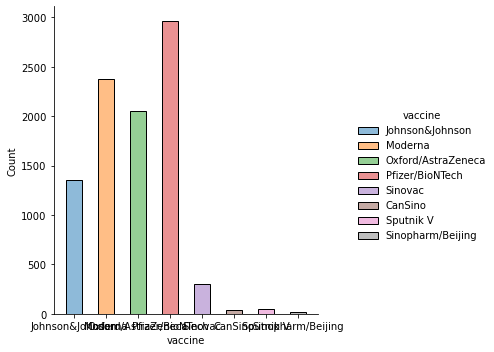

In [26]:
sns.displot(df,x='vaccine',hue='vaccine',shrink=0.5)
#add hue for see better vaccine names

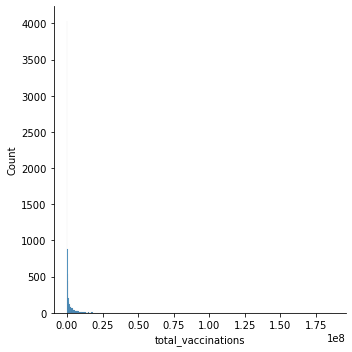

In [27]:
sns.displot(df,x='total_vaccinations')

<AxesSubplot:xlabel='total_vaccinations', ylabel='vaccine'>

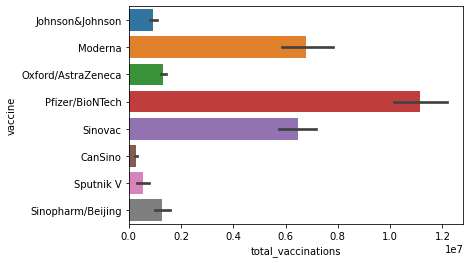

In [28]:
sns.barplot(x='total_vaccinations',y='vaccine',data=df)

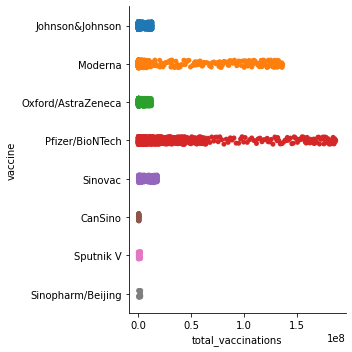

In [29]:
sns.catplot(x='total_vaccinations',y='vaccine',data=df)

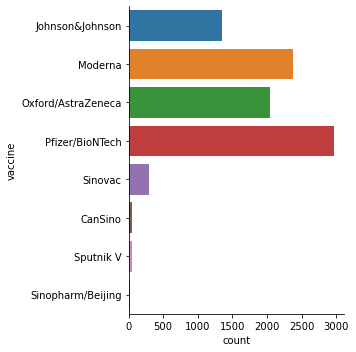

In [30]:
sns.catplot(y='vaccine',kind='count',data=df)

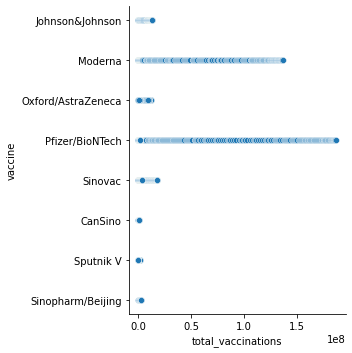

In [31]:
sns.relplot(x='total_vaccinations',y='vaccine',data=df)

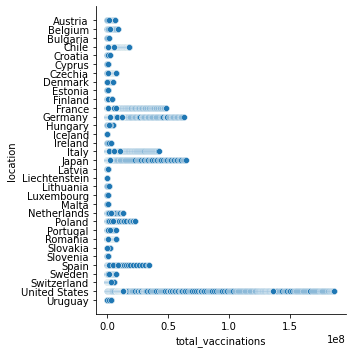

In [32]:
sns.relplot(x='total_vaccinations',y='location',data=df)

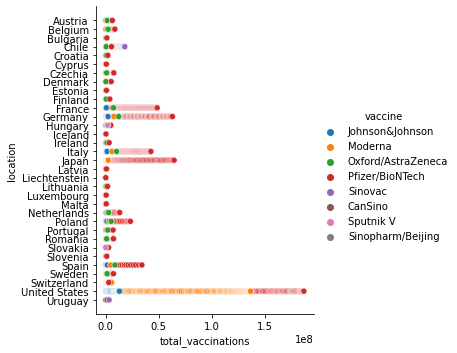

In [33]:
sns.relplot(x='total_vaccinations',y='location',hue='vaccine',data=df)

<AxesSubplot:xlabel='date', ylabel='total_vaccinations'>

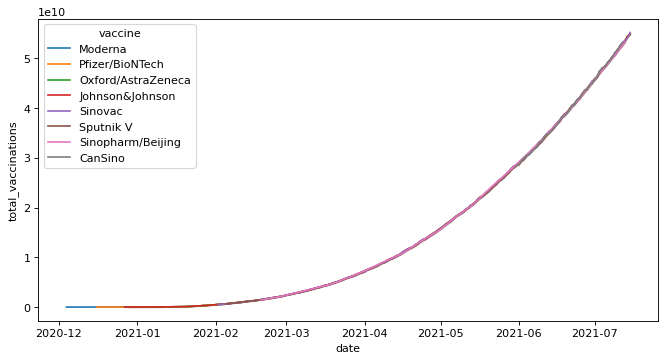

In [34]:
plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='date', y='total_vaccinations', hue='vaccine', data=data)

## Prepare Data for Machine learning

In [35]:
df.head()

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,30974
4,Austria,2021-01-15,Johnson&Johnson,0


In [36]:
df2.head()

,year,month,day,total_vaccinations
0,2020.0,12.0,4.0,1.0
1,2020.0,12.0,16.0,2.0
2,2020.0,12.0,20.0,6.0
3,2020.0,12.0,22.0,9.0
4,2020.0,12.0,24.0,429.0


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 207
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                208 non-null    float64
 1   month               208 non-null    float64
 2   day                 208 non-null    float64
 3   total_vaccinations  208 non-null    float64
dtypes: float64(4)
memory usage: 8.1 KB


In [38]:
x = df2.iloc[: , [0,1,2] ].values
y = df2.iloc[: , 3 ].values

In [39]:
x

array([[2.020e+03, 1.200e+01, 4.000e+00],
       [2.020e+03, 1.200e+01, 1.600e+01],
       [2.020e+03, 1.200e+01, 2.000e+01],
       [2.020e+03, 1.200e+01, 2.200e+01],
       [2.020e+03, 1.200e+01, 2.400e+01],
       [2.020e+03, 1.200e+01, 2.500e+01],
       [2.020e+03, 1.200e+01, 2.600e+01],
       [2.020e+03, 1.200e+01, 2.700e+01],
       [2.020e+03, 1.200e+01, 2.800e+01],
       [2.020e+03, 1.200e+01, 2.900e+01],
       [2.020e+03, 1.200e+01, 3.000e+01],
       [2.020e+03, 1.200e+01, 3.100e+01],
       [2.021e+03, 1.000e+00, 1.000e+00],
       [2.021e+03, 1.000e+00, 2.000e+00],
       [2.021e+03, 1.000e+00, 3.000e+00],
       [2.021e+03, 1.000e+00, 4.000e+00],
       [2.021e+03, 1.000e+00, 5.000e+00],
       [2.021e+03, 1.000e+00, 6.000e+00],
       [2.021e+03, 1.000e+00, 7.000e+00],
       [2.021e+03, 1.000e+00, 8.000e+00],
       [2.021e+03, 1.000e+00, 9.000e+00],
       [2.021e+03, 1.000e+00, 1.000e+01],
       [2.021e+03, 1.000e+00, 1.100e+01],
       [2.021e+03, 1.000e+00, 1.20

In [40]:
y

array([1.00000000e+00, 2.00000000e+00, 6.00000000e+00, 9.00000000e+00,
       4.29000000e+02, 5.62600000e+03, 1.39660000e+04, 5.86310000e+04,
       1.29449000e+05, 2.61890000e+05, 4.73722000e+05, 7.66770000e+05,
       1.11516100e+06, 1.53576200e+06, 2.01541600e+06, 2.62786200e+06,
       3.40085200e+06, 4.33977100e+06, 5.48425700e+06, 8.09942500e+06,
       9.64000100e+06, 1.12898800e+07, 1.31579360e+07, 2.46046830e+07,
       3.73087430e+07, 4.00412280e+07, 5.80159090e+07, 6.11996680e+07,
       6.44903350e+07, 6.80535520e+07, 8.76785820e+07, 1.08489833e+08,
       1.30683326e+08, 1.58871410e+08, 1.84561102e+08, 2.11682335e+08,
       2.39888500e+08, 2.69243694e+08, 3.00065357e+08, 3.32810308e+08,
       3.73549879e+08, 4.10290858e+08, 4.48721107e+08, 4.88575606e+08,
       5.29375584e+08, 5.71859443e+08, 6.16268060e+08, 6.70867735e+08,
       7.19949826e+08, 7.71337209e+08, 8.24487086e+08, 8.79084202e+08,
       9.35965113e+08, 9.95196428e+08, 1.06724175e+09, 1.13167542e+09,
      

In [41]:
print(x.shape)
print(y.shape)

(208, 3)
(208,)


In [42]:
data_dmatrix = xgb.DMatrix(x,label=y)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 9)

In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(166, 3)
(166,)
(42, 3)
(42,)


## Train your model

In [45]:
XGBR = xgb.XGBRegressor(n_estimators=1000,learning_rate=0.08,subsample=0.75,colsample_bytree=1,max_depth=7,gamma=0)
XGBR.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Test the model and show the metrics

In [46]:
scores = cross_val_score(XGBR, x_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % (scores.mean()*100))

Mean cross-validation score: 99.96


In [47]:
scores

array([0.99991425, 0.99923643, 0.99935198, 0.99986987, 0.999217  ,
       0.99959677, 0.99972575, 0.99960355, 0.99974709, 0.99929628])

In [48]:
test_scores = cross_val_score(XGBR, x_test, y_test,cv=10)
print("Mean cross-validation score: %.2f" % (scores.mean()*100))

Mean cross-validation score: 99.96


In [49]:
test_scores

array([0.99783488, 0.99227604, 0.97504368, 0.99328395, 0.97111867,
       0.99831628, 0.95007923, 0.99359836, 0.94556893, 0.99422325])

In [50]:
pred = XGBR.predict(x_test)

In [51]:
r2 = r2_score(y_test, pred)
print("R_Squared Score : %f" % (r2))

R_Squared Score : 0.999843


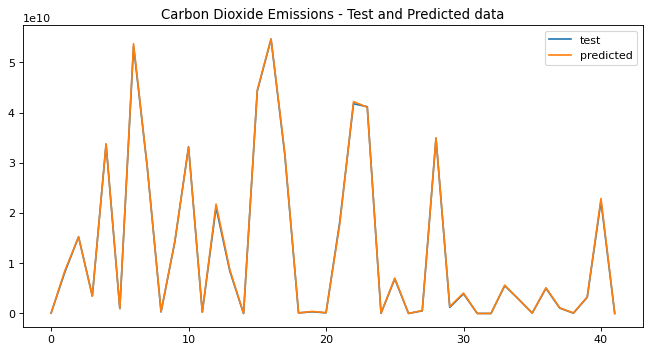

In [52]:
plt.figure(figsize=(10, 5), dpi=80)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="test")
plt.plot(x_ax, pred, label="predicted")
plt.title("Carbon Dioxide Emissions - Test and Predicted data")
plt.legend()
plt.show()

## Save your final model

In [53]:
# import joblib
filename = 'covid19_vaccinations.sav'
joblib.dump(XGBR, filename)

['covid19_vaccinations.sav']

In [54]:
# for load data
loaded_model = joblib.load(filename)
# for use data
result = loaded_model.score(x_test,y_test)
print(result)

0.9998425438582518


## Send us the Result (Maktabkhoone)